In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram
  from qiskit import Aer,execute
  from qiskit.quantum_info import partial_trace,Statevector
except:
  print("Installing Corresponing Dependencies")
  ! pip install -q qiskit pylatexenc qiskit-aer
  ! pip install -q git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram
  from qiskit.quantum_info import partial_trace,Statevector
  from qiskit import Aer,execute


Dependencies are already installed. Skipping...


In [2]:
qiskit.__version__

'0.25.1'

In [3]:
!rm -r modules

In [4]:
import requests
from pathlib import Path
import os

directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)

helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py",
    "algorithms_utils.py":"https://github.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/raw/master/modules/utils/algorithms_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [5]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement
from modules.algorithms_utils import *

In [6]:
backend = Aer.get_backend('statevector_simulator')

# Build the quantum part of the shor algorithm (find p)

In [7]:
def shor_iteration(n,g):
  # initialize the quantum circuit
  qr = QuantumRegister(n+4)
  cr = ClassicalRegister(n)
  qc = QuantumCircuit(qr,cr)
  # apply superposition to all the qubits
  initialize_quantum_circuit(qc,range(n),hadamard=True)
  # activate the control qubits that allows the induction of a phase factor
  qc.x(n+3)
  # add the increasing phase kickback gates
  for i in range(n):
    qc.append(c_amod15(g,2**i),[i] + [j+n for j in range(4)])
  # apply the inverse quantum fourier transform
  qc.append(qft_dagger(n),range(n))
  # measure the corresponding qubits
  qc.measure(range(n),range(n))
  return qc

# One single manual iteration of the algorithm

In [8]:
g = 7
n = 8
qc = shor_iteration(n,g)

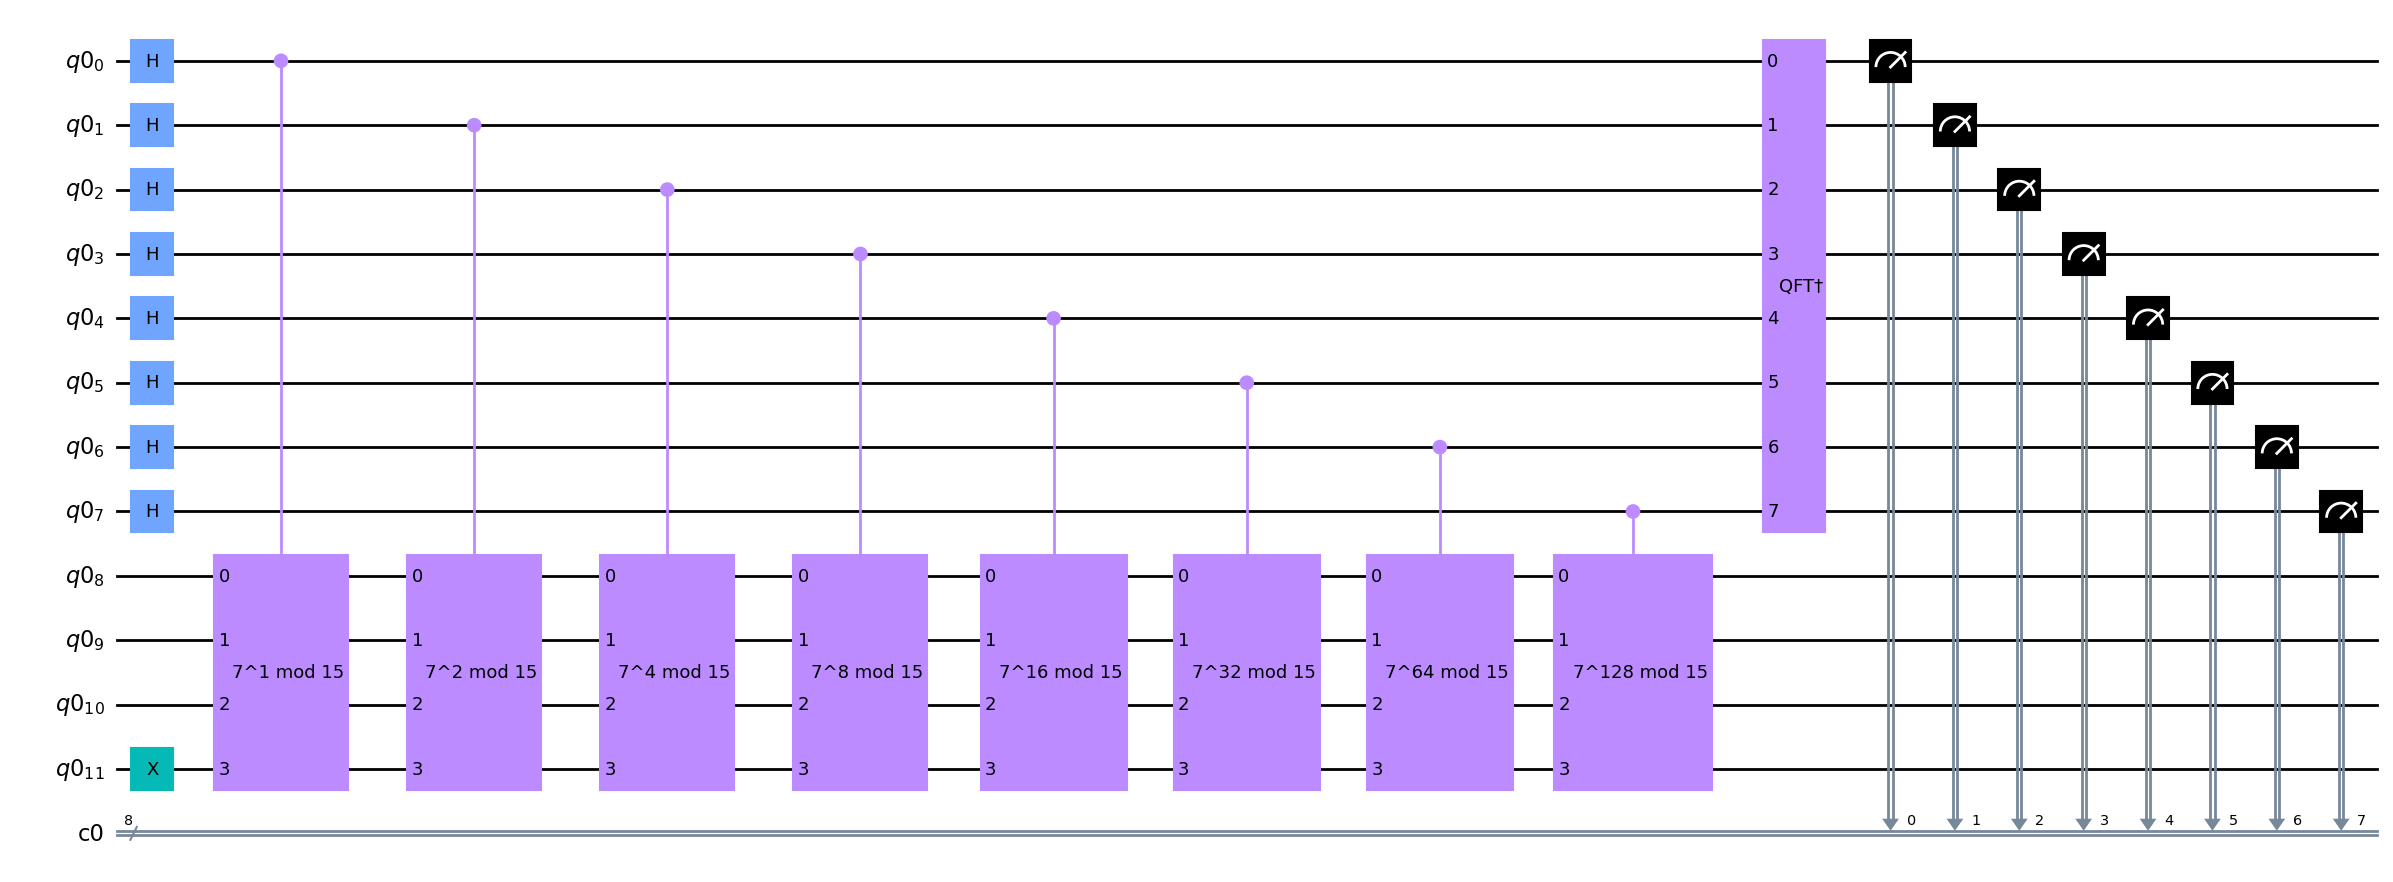

In [9]:
qc.draw("mpl",fold=-1)

In [10]:
counts = ideal_qc_simulation(qc,backend)

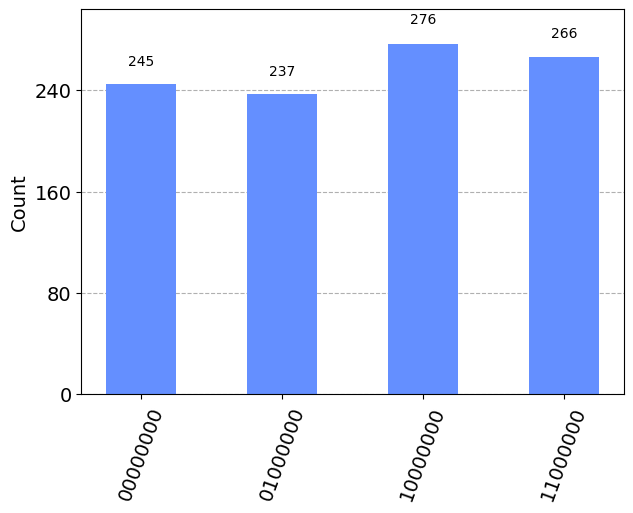

In [11]:
plot_histogram(counts)

In [12]:
df = getDataFrame(n,counts)
df.head()

,Phase,Fraction,Guess for r
0,0.25,1/4,4
1,0.00,0/1,1
2,0.50,1/2,2
3,0.75,3/4,4


In [15]:
gcd(g**2+1,15),gcd(g**2-1,15)

(5, 3)